In [1]:
import pandas as pd
dataset=pd.read_csv("MUL REG& DT.csv ")

In [2]:
dataset

,ID,AGE,EXPERIENCE,EDUCATION,CITY,SALARY
0,1,25,2,BACHELORS,NEW YORK,45000
1,2,32,5,MASTERS,LOS ANGELES,60000
2,3,28,4,BACHELORS,CHICAGO,52000
3,4,40,10,PhD,NEW YORK,90000
4,5,35,8,MASTERS,CHICAGO,75000
5,6,23,1,BACHELORS,LOS ANGELES,40000
6,7,45,20,PhD,NEW YORK,120000
7,8,38,12,MASTERS,CHICAGO,85000
8,9,30,6,BACHELORS,LOS ANGELES,57000
9,10,29,3,MASTERS,NEW YORK,50000


In [3]:
dataset=pd.get_dummies(dataset,drop_first=True)

In [4]:
dataset

,ID,AGE,EXPERIENCE,SALARY,EDUCATION_MASTERS,EDUCATION_PhD,CITY_LOS ANGELES,CITY_NEW YORK
0,1,25,2,45000,False,False,False,True
1,2,32,5,60000,True,False,True,False
2,3,28,4,52000,False,False,False,False
3,4,40,10,90000,False,True,False,True
4,5,35,8,75000,True,False,False,False
5,6,23,1,40000,False,False,True,False
6,7,45,20,120000,False,True,False,True
7,8,38,12,85000,True,False,False,False
8,9,30,6,57000,False,False,True,False
9,10,29,3,50000,True,False,False,True


In [5]:
dataset.columns

Index(['ID', 'AGE', 'EXPERIENCE', 'SALARY', 'EDUCATION_MASTERS',
       'EDUCATION_PhD', 'CITY_LOS ANGELES', 'CITY_NEW YORK'],
      dtype='object')

In [6]:
independant=dataset[['ID', 'AGE', 'EXPERIENCE','EDUCATION_MASTERS',
       'EDUCATION_PhD', 'CITY_LOS ANGELES', 'CITY_NEW YORK']]

In [7]:
dependant=dataset[['SALARY']]

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(independant,dependant,test_size=0.30,random_state=0)

In [49]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion="poisson",splitter="best")
regressor.fit(x_train,y_train)

DecisionTreeRegressor(criterion='poisson')

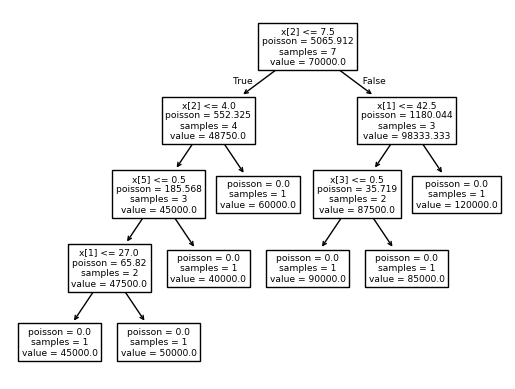

In [50]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [51]:
y_pred=regressor.predict(x_test)

In [52]:
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)

In [53]:
r_score

0.613895216400911